In [72]:
from limits import LimitFigure, ara_energies, ara_available, ara_projected
import importlib
import limits
importlib.reload(limits)

<module 'limits' from '/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/plotting/limits/limits.py'>

/apps/python/3.6-conda5.2/lib/python3.6/site-packages/matplotlib/legend.py:592: UserWarning: The handle <matplotlib.lines.Line2D object at 0x2af615dabf60> has a label of '_line0' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


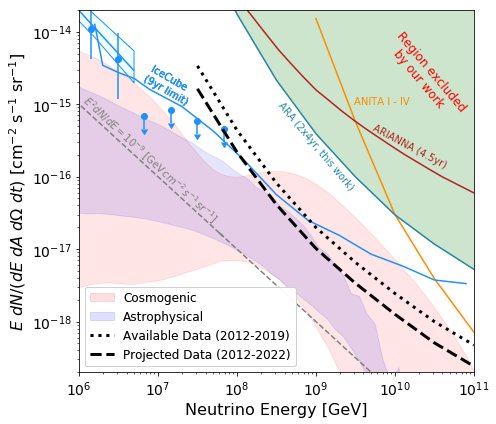

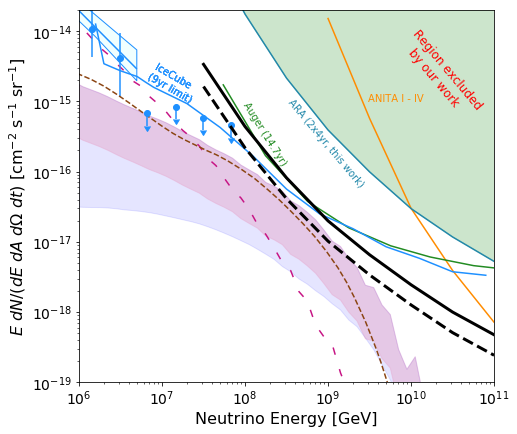

In [73]:
figure = LimitFigure(e_power=1, xlims=(1e6, 1e11), ylims=(2e-19, 2e-14), font_size=16, tick_size=14)
# figure.build_base_plot('ara',models = ['ahlers_1','ahlers_100','batista','batista_low_z','van_vliet2019', 'van_vliet2019_Elow', 'wittkowski_off','wittkowski','van_vliet2019_hard','van_vliet2019_soft','diagonal','kotera_FRII','vanvliet19_highE_hard','kotera'])
figure.build_base_plot('ara',models = ['ahlers_1','diagonal','van_vliet2019',"murase_grb","fang_pulsar_max"])
figure.add_limit('ARA', ara_energies, ara_available*0.9,
                stations=2.44, years=1, color='black', linestyle="dotted",
                label='Available Data (2012-2019)')
figure.add_limit('ARA', ara_energies, ara_projected*0.9,
                stations=2.44, years=1, color='black', linestyle='dashed',
                label='Projected Data (2012-2022)')
figure.show(legend_size=12, save_name='limits_Hayes.pdf')

figure = LimitFigure(e_power=1, xlims=(1e6, 1e11), ylims=(1e-19, 2e-14), font_size=16, tick_size=14)
figure.build_base_plot('ara_src')
figure.add_limit('ARA', ara_energies, ara_available*0.9,
                stations=2.44, years=1, color='black', linestyle=None,
                label='Available Data (2012-2020)')
figure.add_limit('ARA', ara_energies, ara_projected*0.9,
                stations=2.44, years=1, color='black', linestyle='--',
                label='Projected Data (2012-2023)')

# figure.show(legend_size=12)#, save_name='e1_source_plot_ara2019.pdf')

  # Neutrinos per year  

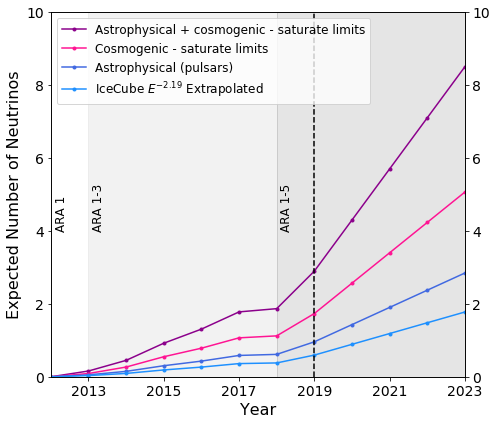

[ 0.07549211  0.38325816  1.3746732   3.32090999  6.36363583 12.03244012
 22.42344502 37.08363195]
[ 0.10743415  0.57830442  2.1373958   6.39118935 13.63561644 25.45847424
 42.15179516 62.90709576]
[  0.18035581   0.96071615   3.53246096  10.21697806  21.48204639
  40.17439095  67.61213629 102.48842302]
[ 0.14205182  0.76464696  2.82611222  8.45057259 18.02931507 33.66176039
 55.73404027 83.17715995]
[  0.18137476   0.96598457   3.551541    10.26663436  21.58122951
  40.36098753  67.94451523 103.01836331]
[ 0.03270773  0.17606157  0.65071828  1.94576209  4.15128767  7.75069105
 12.83287986 19.15171582]
[  0.47457335   2.30367428   8.11243638  22.04611026  45.79727105
  85.65226599 150.32297127 226.63567322]
[  0.68806957   3.23225814  11.19538829  29.84762414  61.90016592
 115.72177467 206.04401438 308.74187974]
[  0.68806957   3.23225814  11.19538829  29.84762414  61.90016592
 115.72177467 206.04401438 308.74187974]
[  0.68806957   3.23225814  11.19538829  29.84762414  61.90016592
 11

In [52]:
import neutrino_plots
importlib.reload(neutrino_plots)
from limits import (LimitFigure, count_neutrinos, ara_energies,
                    ara_100m, ara_200m, ara_200mpa)

fluxes = {
#         "SFR $E_{max}=10^{21.5}$, Kotera et al.": neutrino_plots.kotera_high_e_flux,
#         "SFR $E_{max}=10^{20.5}$, Kotera et al.": neutrino_plots.kotera_sfr_flux,
        "Astrophysical + cosmogenic - saturate limits": neutrino_plots.pulsar_koteraFRII,
        "Cosmogenic - saturate limits": neutrino_plots.kotera_FRII,
        "Astrophysical (pulsars)": neutrino_plots.fang_pulsar_max_flux,
        "IceCube $E^{-2.19}$ Extrapolated": lambda e: LimitFigure._i3_nu_fit(e, slope=-2.19, offset=1.01),

#         "100% protons, Ahlers & Halzen": neutrino_plots.ahlers_100_flux,
#         "10% protons, Ahlers & Halzen": neutrino_plots.ahlers_10_flux,
#         "1% protons, Ahlers & Halzen": neutrino_plots.ahlers_1_flux,
    }

styles = {
#     "SFR $E_{max}=10^{21.5}$, Kotera et al.": "deeppink.--",
#     "SFR $E_{max}=10^{20.5}$, Kotera et al.": "darkmagenta.--",
    "Astrophysical + cosmogenic - saturate limits": "darkmagenta.-",
    "Cosmogenic - saturate limits": "deeppink.-",
    "Astrophysical (pulsars)": "royalblue.-",
    "IceCube $E^{-2.19}$ Extrapolated": "dodgerblue.-",

    
#     "100% protons, Ahlers & Halzen": "mediumblue.-.",
#     "10% protons, Ahlers & Halzen": "royalblue.-.",
#     "1% protons, Ahlers & Halzen": "cornflowerblue.-.",
}

ara_by_year = [284*ara_100m/366, (217+233)*ara_200m/365, (124*ara_100m+(313+304)*ara_200m)/365,
               (345+250)*ara_200m/365, (127*ara_100m+(323+297)*ara_200m)/366, 137*ara_200m/365,
               (316*ara_100m+(303+316+313)*ara_200m+186*ara_200mpa)/365,
               ara_100m+3*ara_200m+ara_200mpa, ara_100m+3*ara_200m+ara_200mpa, ara_100m+3*ara_200m+ara_200mpa,ara_100m+3*ara_200m+ara_200mpa]

neutrino_plots.plot_neutrinos_by_year_ara(fluxes, ara_energies, ara_by_year, styles=styles,
                           years=[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
                           stations=["ARA 1", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-5"],
                           save_name='yearly_neutrinos_ara_fluxes_2019proposal.pdf',xlim=[2012,2023])


# fluxes = {
#     "AGN, Murase": neutrino_plots.murase_agn_flux,
#     "GRB afterglow-late prompt, Murase": neutrino_plots.murase_grb_late_flux,
#     "GRB afterglow-wind, Murase": neutrino_plots.murase_grb_wind_flux,
#     "GRB afterglow-ISM, Murase": neutrino_plots.murase_grb_ism_flux,
#     "Clusters, Fang & Murase": neutrino_plots.fang_cluster_flux,
# }

# styles = {
#     "AGN, Murase": "red.--",
#     "GRB afterglow-late prompt, Murase": "saddlebrown.-.",
#     "GRB afterglow-wind, Murase": "goldenrod.-.",
#     "GRB afterglow-ISM, Murase": "gold.-.",
#     "Clusters, Fang & Murase": "mediumvioletred.&",
# }

# neutrino_plots.plot_neutrinos_by_year_ara(fluxes, ara_energies, ara_by_year, styles=styles,
#                            years=[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
#                            stations=["ARA 1", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-5"])#,
# #                            save_name='yearly_neutrinos_ara_sources_2019proposal.pdf')

In [54]:
station_years= [284/366, (217+233)/365, (124+(313+304))/365,
               (345+250)/365, (127+(323+297))/366, 137/365,
               (316+(303+316+313)+186)/365,
               1+3+1, 1+3+1, 1+3*1+1,1+3*1+1]



In [64]:
cumulative=0
year=2012
for i in range(0,len(station_years)):
    cumulative+=station_years[i]
    print(str(year) + "\t"+"%0.2f"%cumulative)
    year+=1

2012	0.78
2013	2.01
2014	4.04
2015	5.67
2016	7.71
2017	8.09
2018	12.01
2019	17.01
2020	22.01
2021	27.01
2022	32.01
